In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


ModuleNotFoundError: No module named 'cv2'

In [2]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            continue
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            continue
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
#     labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    labels = {4:'sea',1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [3]:
Images, Labels = get_images('../input/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [4]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (9439, 150, 150, 3)
Shape of Labels: (9439,)


Let us look some random images of our dataset.

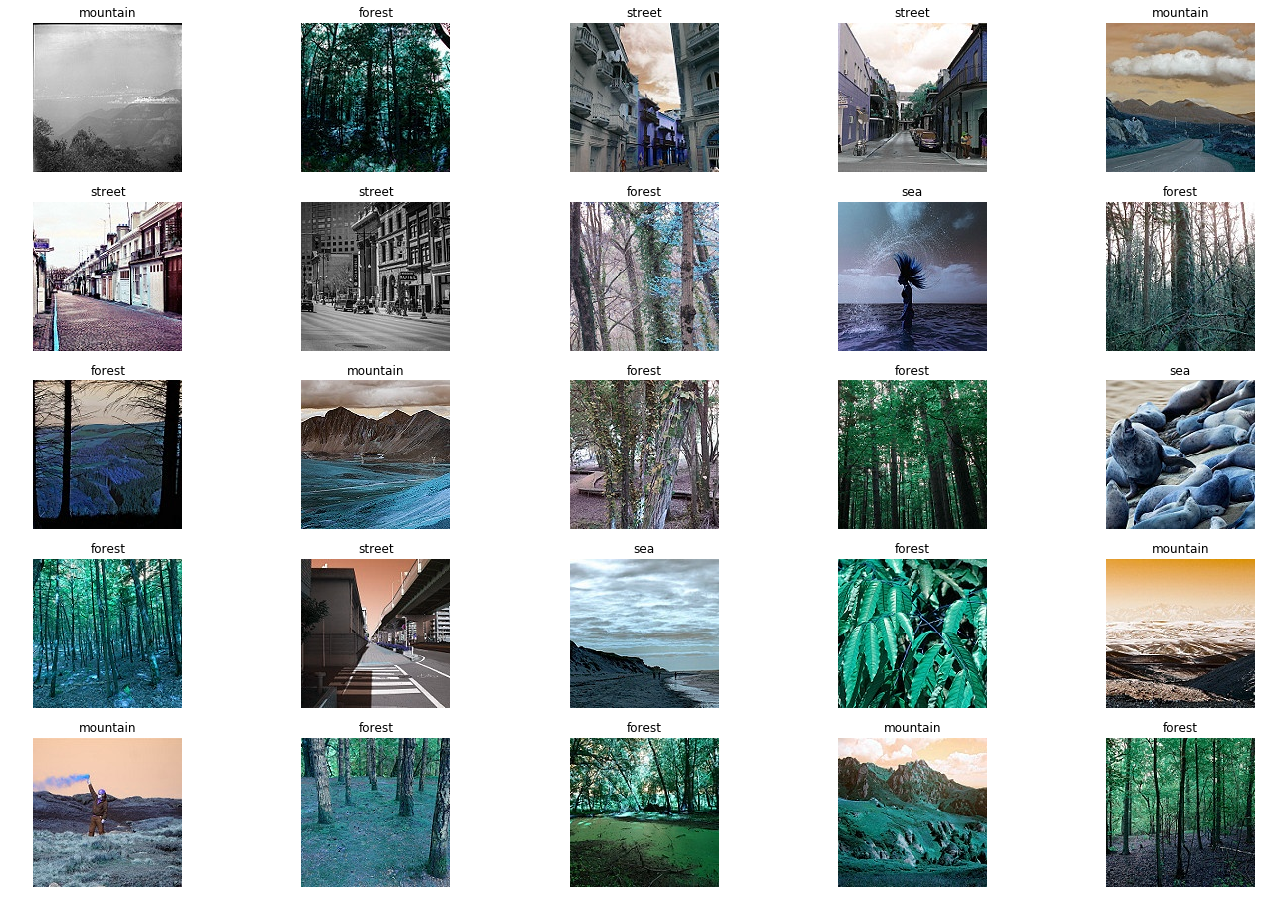

In [5]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [6]:
import tensorflow as tf
model = Models.Sequential()

# 기본값은 어떤 걸 주느냐?
# xavier을 주는데,
#[-sqrt(6/(w input 갯수 + w output 갯수),
#sqrt(6/(w input 갯수 + w output 갯수)]

# 3 * 3의 필터를 200개를 쓰겠다.
model.add(Layers.Conv2D(400,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),
                       kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False)))
# 3 * 3의 필터를 200개를 쓰겠다.
# model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
# 여태까지 한 거 5 * 5 크기로 pooling
model.add(Layers.MaxPool2D(5,5))
# 3 * 3의 필터를 180개를 쓰겠다.
# model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
# 3 * 3의 필터를 140개를 쓰겠다.
# model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
# 3 * 3의 필터를 100개를 쓰겠다.
# 여태까지 한 거 5 * 5 크기로 pooling
model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu'))
# 3 * 3의 필터를 50개를 쓰겠다.
# model.add(Layers.MaxPool2D(5, 5))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.7))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

#Utils.plot_model(model,to_file='model.png',show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 400)     11200     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 400)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 200)       720200    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 100)       180100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 180)               4

In [7]:
trained = model.fit(Images,Labels,epochs=50,validation_split=0.2)

Train on 7551 samples, validate on 1888 samples
Epoch 1/50
7551/7551 [==============================] - 17s 2ms/sample - loss: 1.9341 - acc: 0.3945 - val_loss: 0.8779 - val_acc: 0.7002
Epoch 2/50
7551/7551 [==============================] - 15s 2ms/sample - loss: 1.1221 - acc: 0.5401 - val_loss: 0.6619 - val_acc: 0.7675
Epoch 3/50
7551/7551 [==============================] - 15s 2ms/sample - loss: 0.9613 - acc: 0.6105 - val_loss: 0.6940 - val_acc: 0.7447
Epoch 4/50
7551/7551 [==============================] - 15s 2ms/sample - loss: 0.8710 - acc: 0.6463 - val_loss: 0.5363 - val_acc: 0.8125
Epoch 5/50
7551/7551 [==============================] - 15s 2ms/sample - loss: 0.8232 - acc: 0.6660 - val_loss: 0.7365 - val_acc: 0.7203
Epoch 6/50
7551/7551 [==============================] - 15s 2ms/sample - loss: 0.7685 - acc: 0.6924 - val_loss: 0.4267 - val_acc: 0.8438
Epoch 7/50
7551/7551 [==============================] - 15s 2ms/sample - loss: 0.7011 - acc: 0.7240 - val_loss: 0.3761 - val_acc: 

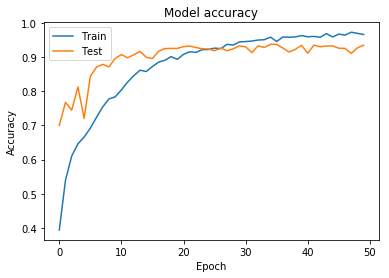

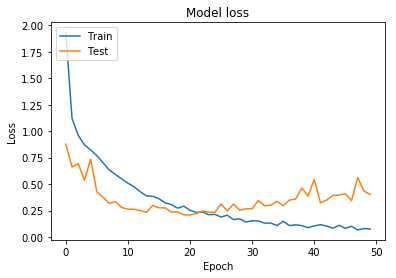

In [12]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [13]:
test_images,test_labels = get_images('../input/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

2010/2010 [==============================] - 1s 654us/sample - loss: 0.4278 - acc: 0.9403


[0.4278056305915405, 0.9402985]

In [14]:
pred_images,no_labels = get_images('../input/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

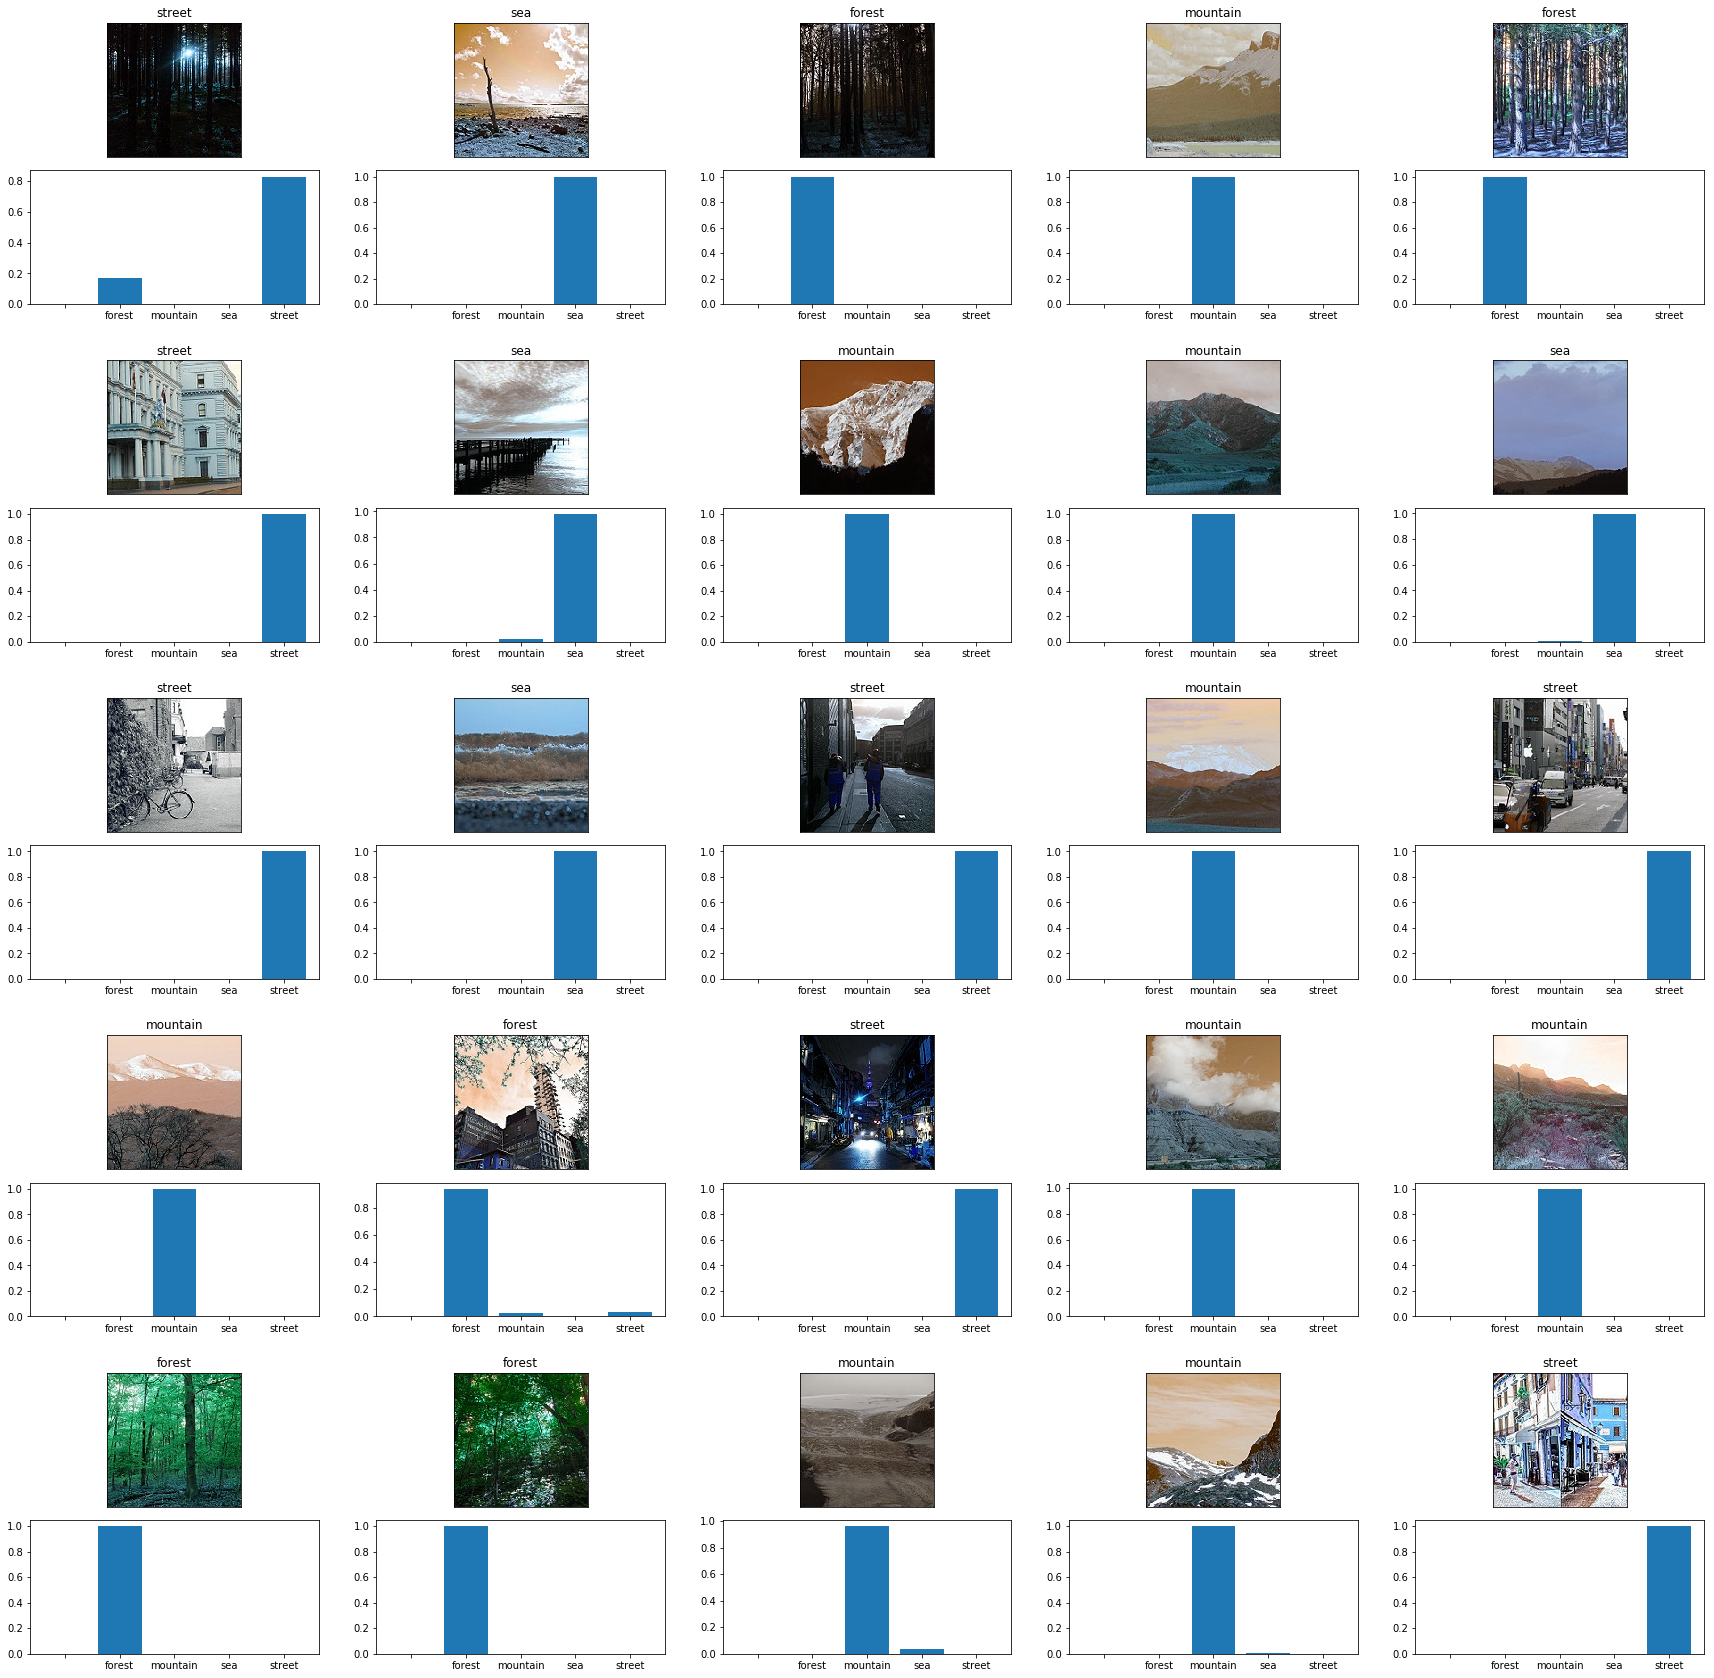

In [27]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar(['', 'forest', '', 'mountain', 'sea', 'street'],pred_prob)
            fig.add_subplot(ax)


fig.show()